# Imports

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

from data import HRFDataset, DataLoaderFactory, DatasetLoader
from classify import ClassificationResult, ClassifierFactory, ImageProcessingClassifier, \
    ImageProcessingClassifierTurboExtra, ImageProcessingClassifierV4, \
    KnnClassifier, NeuralNetworkClassifier


tf.autograph.set_verbosity(0, True)

# Loading dataset

In [2]:
dataset = HRFDataset()
dataset_loader = DatasetLoader(dataset, seed=0, validation_size=5)

Download: 100.0%

# Notebook functions

In [3]:
SUMMARY_FIELDS = ['duration', 'accuracy', 'sensitivity', 'specificity']
SUMMARY = dict()


def show_result(result):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    ax1.set_title("Input image")
    ax1.imshow(result.input_image)
    ax2.set_title("Expected result")
    ax2.imshow(result.expected_result, cmap="gray")
    ax3.set_title("Actual result")
    ax3.imshow(result.actual_result, cmap="gray")
    ax4.set_title("Error matrix")
    ax4.imshow(result.error_matrix)
    plt.show()
    
    for key, value in result.data:
        display(Markdown(f"**{key}**: {value}"))
    display(Markdown("***"))
    
    
def show_summary(name, summary):
    display(Markdown("### Summary"))
    display(Markdown(f"**Classifier**: {name}"))
    for key in SUMMARY_FIELDS:
        display(Markdown(
            f"**{ClassificationResult.get_label(key)}**: {ClassificationResult.get_format(key) % (np.mean(summary[key]))}"
        ))
        

def run_classifier(cls, raw_image_loader_kwargs=None, image_loader_kwargs=None, 
                   mask_loader_kwargs=None, load=False, **kwargs):
    
    display(Markdown(f"# {cls.NAME}"))
    
    raw_image_loader = DataLoaderFactory.create_data_loader(**raw_image_loader_kwargs)
    image_loader = DataLoaderFactory.create_data_loader(**image_loader_kwargs)
    mask_loader = DataLoaderFactory.create_data_loader(**mask_loader_kwargs)
    
    generator = dataset_loader.load_training(image_loader, mask_loader)
    classifier = ClassifierFactory.create_classifier(cls, load, generator, **kwargs)
    
    summary = {key: [] for key in SUMMARY_FIELDS}
    
    for data in dataset_loader.load_validation(raw_image_loader, image_loader, mask_loader):
        result = classifier.classify(*data)
        show_result(result)
        
        for key in SUMMARY_FIELDS:
            summary[key].append(result[key])
    
    show_summary(cls.NAME, summary)
    SUMMARY[cls.NAME] = summary

# Classifiers

# Image Processing

Classification done


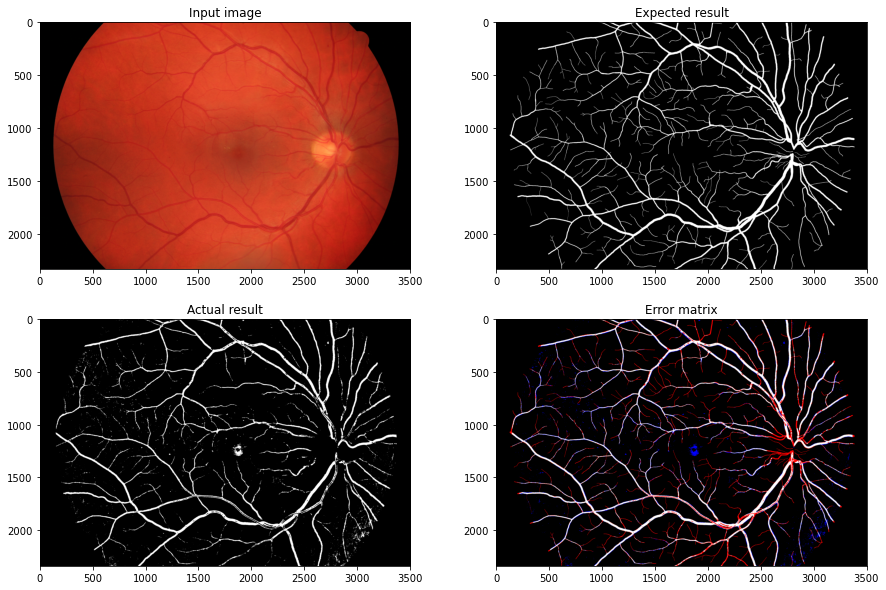

**Name**: 11_dr

**Duration**: 15.4 s

**True positive**: 451738

**False positive**: 120349

**False negative**: 241199

**True negative**: 7372058

**Accuracy**: 95.6%

**Sensitivity**: 65.2%

**Specificity**: 98.4%

***

Classification done


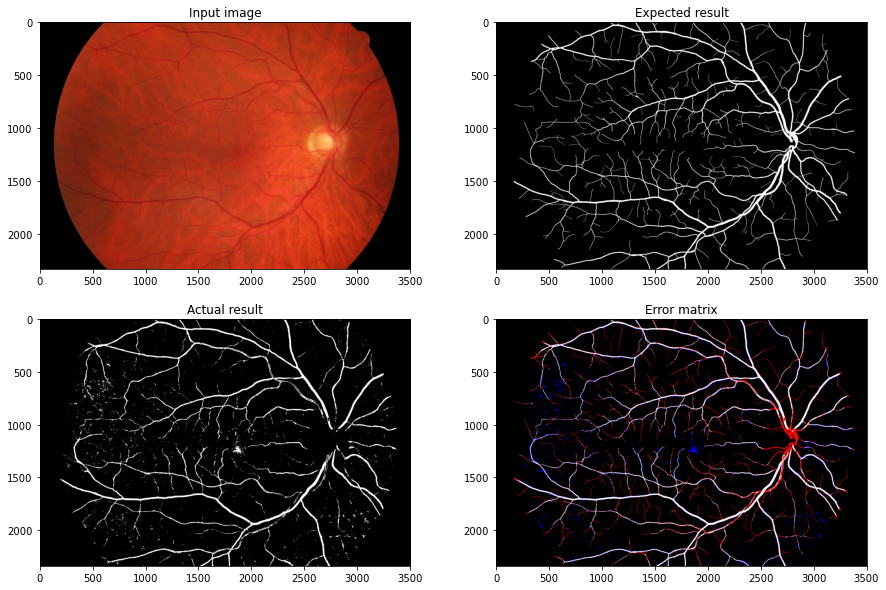

**Name**: 13_g

**Duration**: 14.9 s

**True positive**: 346115

**False positive**: 128422

**False negative**: 210866

**True negative**: 7499941

**Accuracy**: 95.9%

**Sensitivity**: 62.1%

**Specificity**: 98.3%

***

Classification done


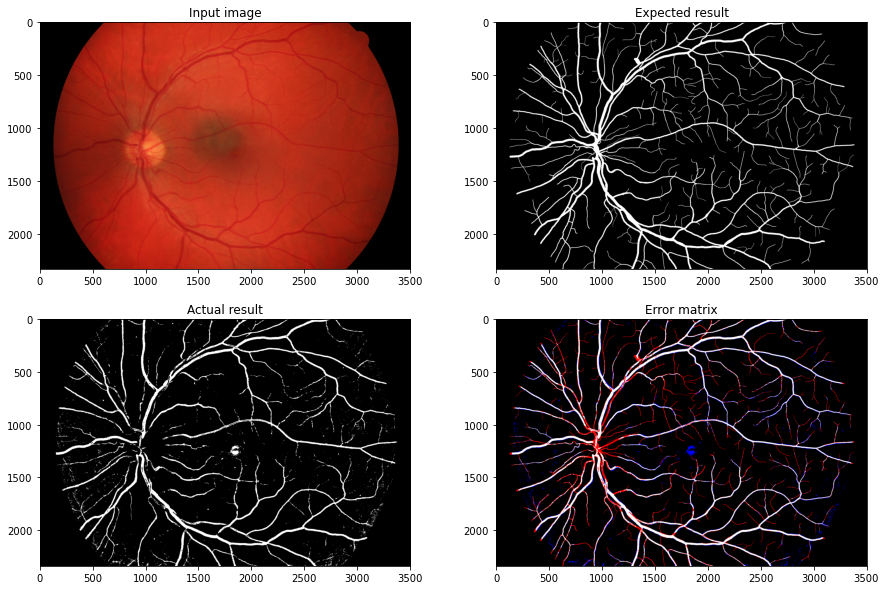

**Name**: 10_dr

**Duration**: 15.3 s

**True positive**: 466671

**False positive**: 144094

**False negative**: 248218

**True negative**: 7326361

**Accuracy**: 95.2%

**Sensitivity**: 65.3%

**Specificity**: 98.1%

***

Classification done


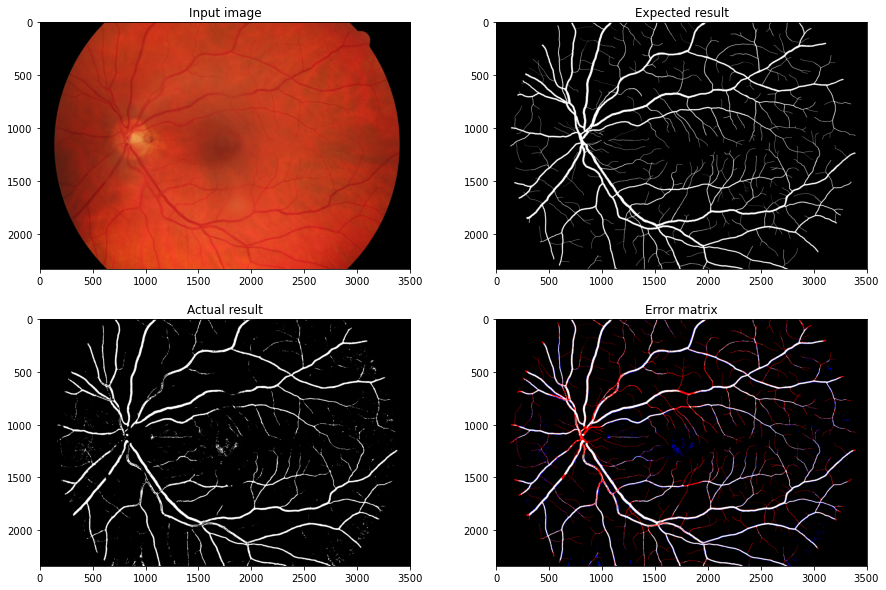

**Name**: 02_g

**Duration**: 16.1 s

**True positive**: 405531

**False positive**: 101677

**False negative**: 204191

**True negative**: 7473945

**Accuracy**: 96.3%

**Sensitivity**: 66.5%

**Specificity**: 98.7%

***

Classification done


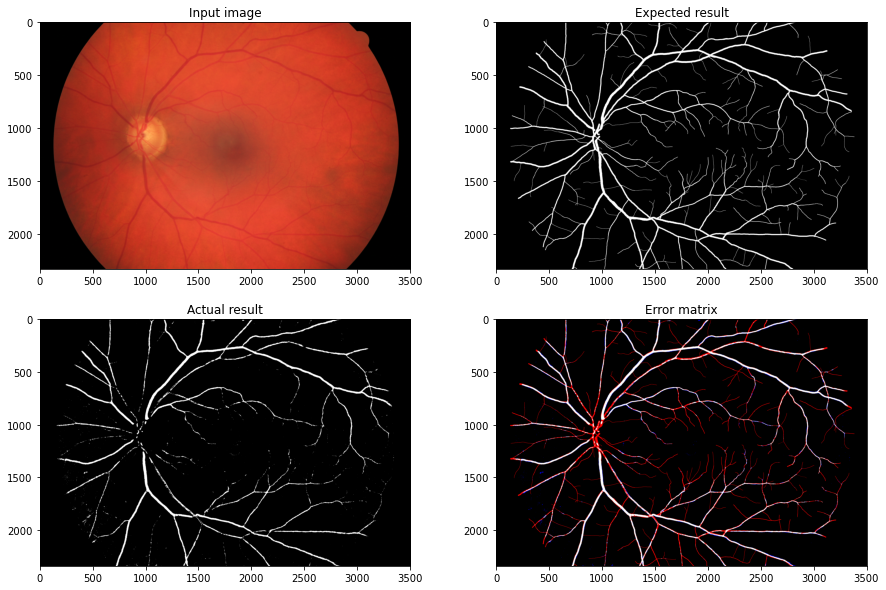

**Name**: 04_g

**Duration**: 14.8 s

**True positive**: 293747

**False positive**: 46123

**False negative**: 233169

**True negative**: 7612305

**Accuracy**: 96.6%

**Sensitivity**: 55.7%

**Specificity**: 99.4%

***

### Summary

**Classifier**: Image Processing

**Duration**: 15.3 s

**Accuracy**: 95.9%

**Sensitivity**: 63.0%

**Specificity**: 98.6%

In [4]:
run_classifier(
    ImageProcessingClassifier, 
    raw_image_loader_kwargs=dict(), 
    image_loader_kwargs=dict(), 
    mask_loader_kwargs=dict(binarize=True)
)

# Image Processing v2

Classification done


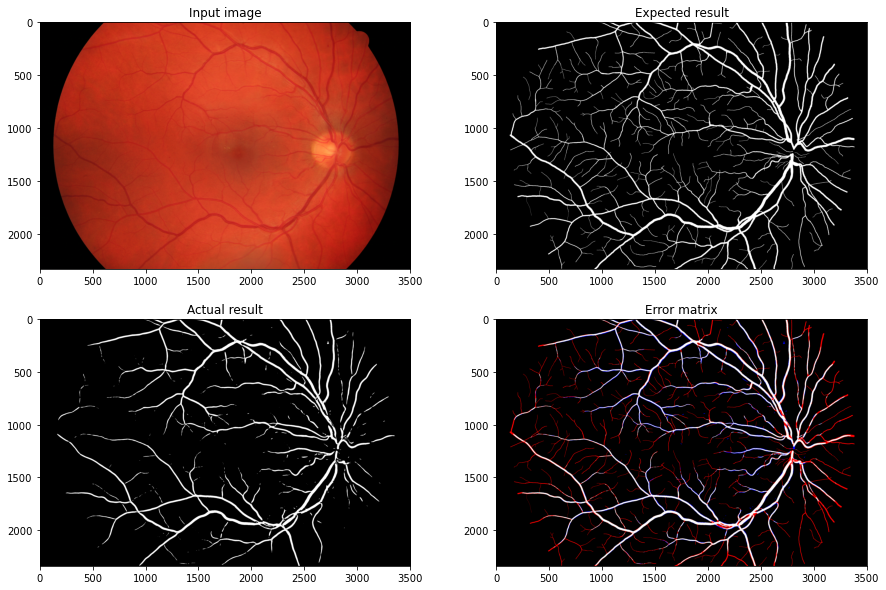

**Name**: 11_dr

**Duration**: 36.1 s

**True positive**: 433226

**False positive**: 87979

**False negative**: 259711

**True negative**: 7404428

**Accuracy**: 95.8%

**Sensitivity**: 62.5%

**Specificity**: 98.8%

***

Classification done


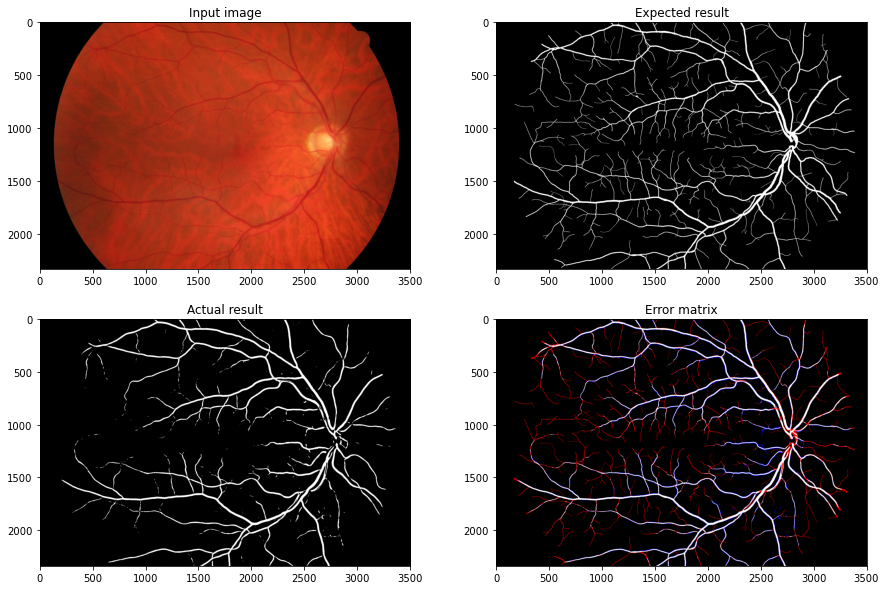

**Name**: 13_g

**Duration**: 34.9 s

**True positive**: 364665

**False positive**: 113982

**False negative**: 192316

**True negative**: 7514381

**Accuracy**: 96.3%

**Sensitivity**: 65.5%

**Specificity**: 98.5%

***

Classification done


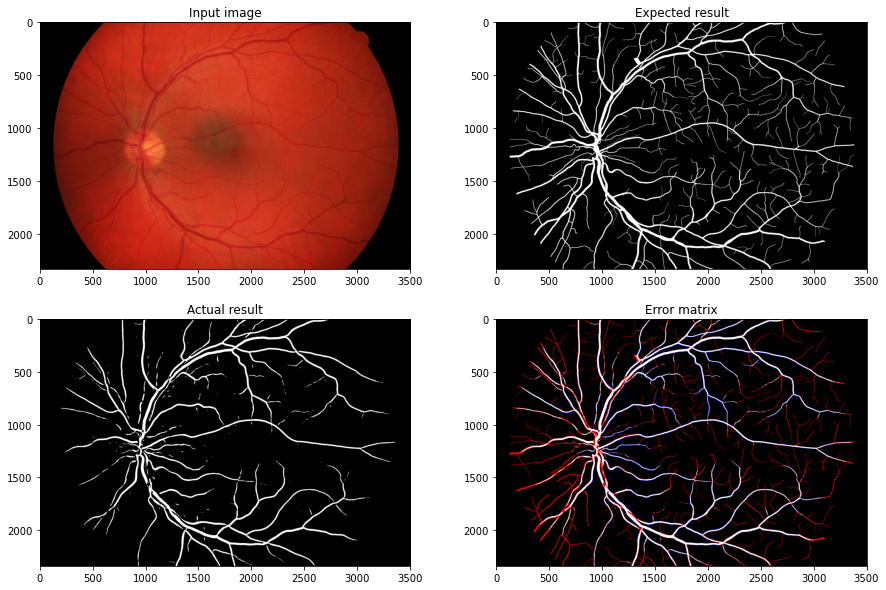

**Name**: 10_dr

**Duration**: 35.0 s

**True positive**: 428994

**False positive**: 92705

**False negative**: 285895

**True negative**: 7377750

**Accuracy**: 95.4%

**Sensitivity**: 60.0%

**Specificity**: 98.8%

***

Classification done


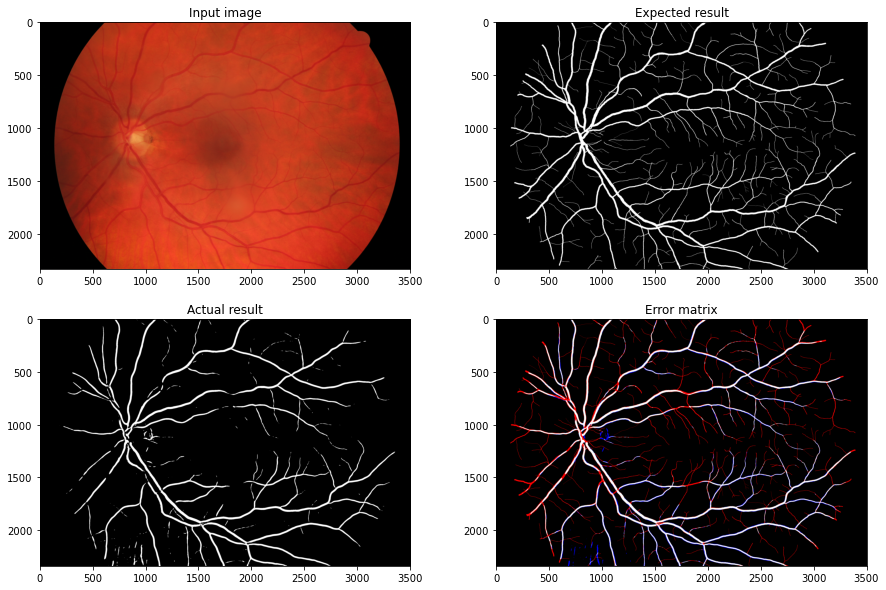

**Name**: 02_g

**Duration**: 34.7 s

**True positive**: 391423

**False positive**: 89879

**False negative**: 218299

**True negative**: 7485743

**Accuracy**: 96.2%

**Sensitivity**: 64.2%

**Specificity**: 98.8%

***

Classification done


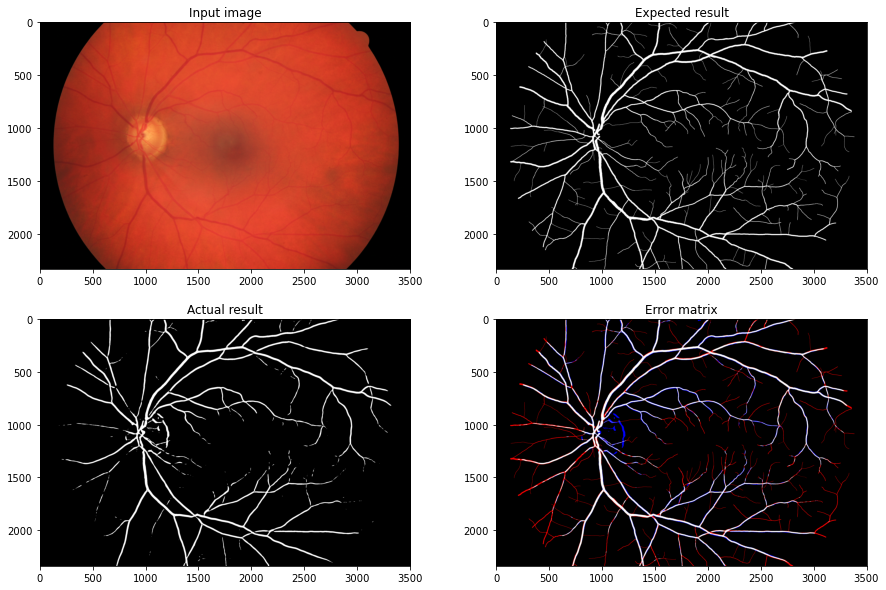

**Name**: 04_g

**Duration**: 40.5 s

**True positive**: 357505

**False positive**: 98545

**False negative**: 169411

**True negative**: 7559883

**Accuracy**: 96.7%

**Sensitivity**: 67.8%

**Specificity**: 98.7%

***

### Summary

**Classifier**: Image Processing v2

**Duration**: 36.2 s

**Accuracy**: 96.1%

**Sensitivity**: 64.0%

**Specificity**: 98.7%

In [5]:
run_classifier(
    ImageProcessingClassifierTurboExtra, 
    raw_image_loader_kwargs=dict(), 
    image_loader_kwargs=dict(), 
    mask_loader_kwargs=dict(binarize=True)
)

# Image Processing v4

Classification done


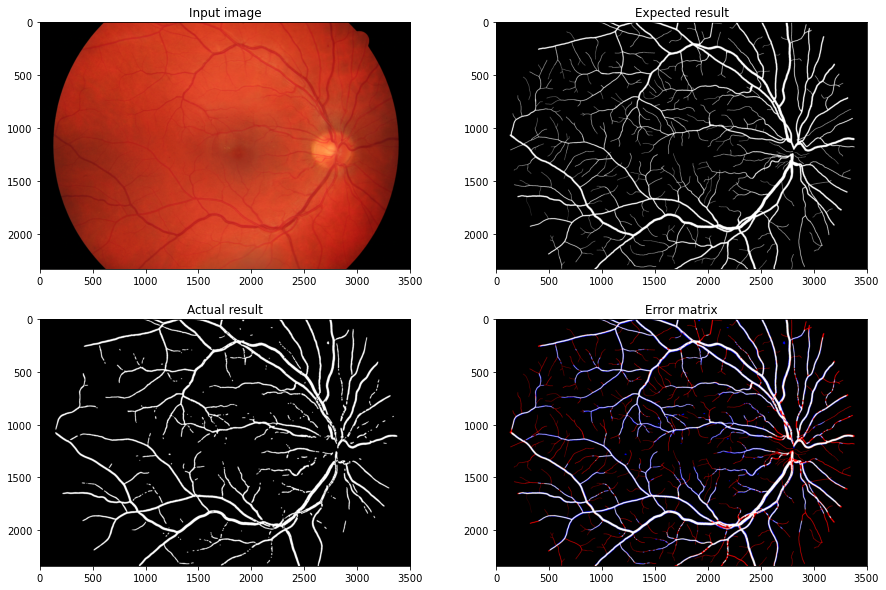

**Name**: 11_dr

**Duration**: 25.2 s

**True positive**: 500148

**False positive**: 188202

**False negative**: 192789

**True negative**: 7304205

**Accuracy**: 95.3%

**Sensitivity**: 72.2%

**Specificity**: 97.5%

***

Classification done


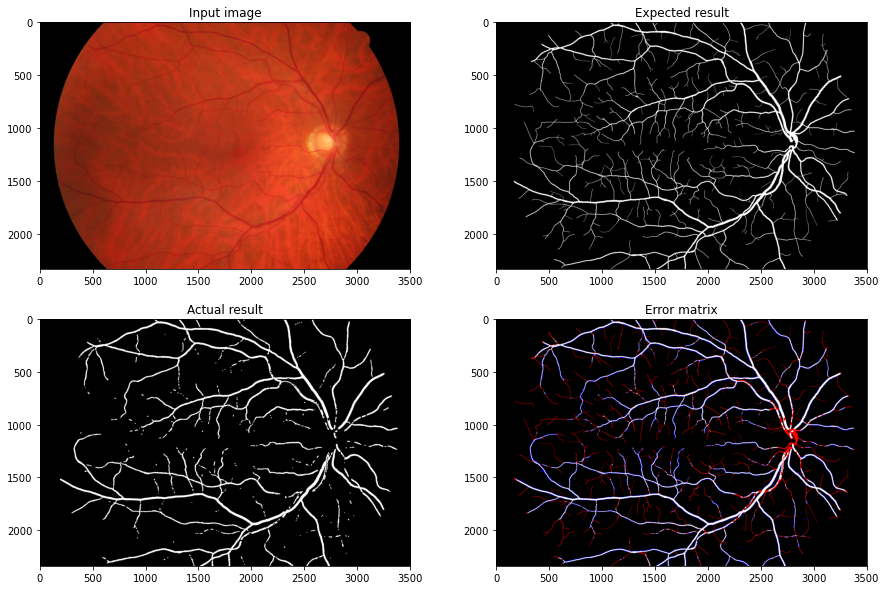

**Name**: 13_g

**Duration**: 25.4 s

**True positive**: 385454

**False positive**: 175270

**False negative**: 171527

**True negative**: 7453093

**Accuracy**: 95.8%

**Sensitivity**: 69.2%

**Specificity**: 97.7%

***

Classification done


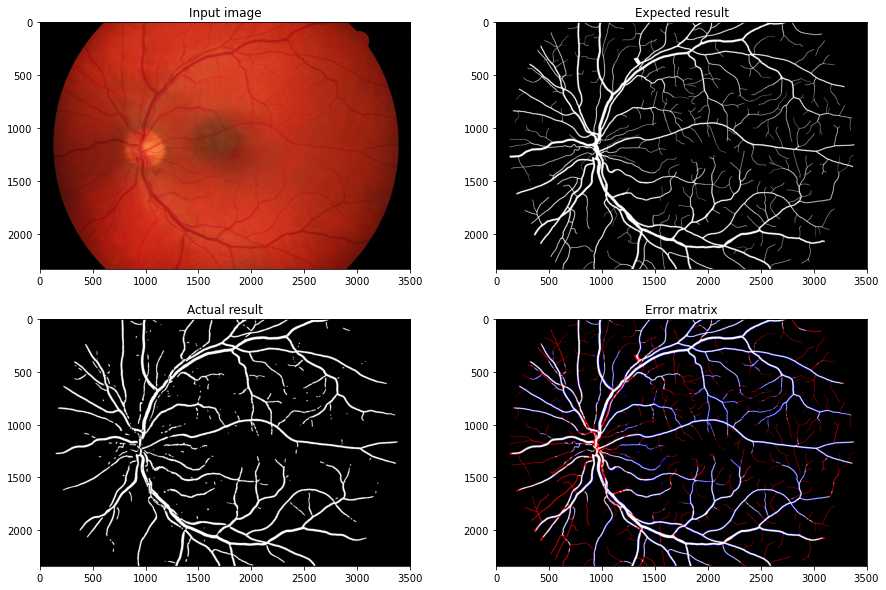

**Name**: 10_dr

**Duration**: 26.6 s

**True positive**: 511364

**False positive**: 211080

**False negative**: 203525

**True negative**: 7259375

**Accuracy**: 94.9%

**Sensitivity**: 71.5%

**Specificity**: 97.2%

***

Classification done


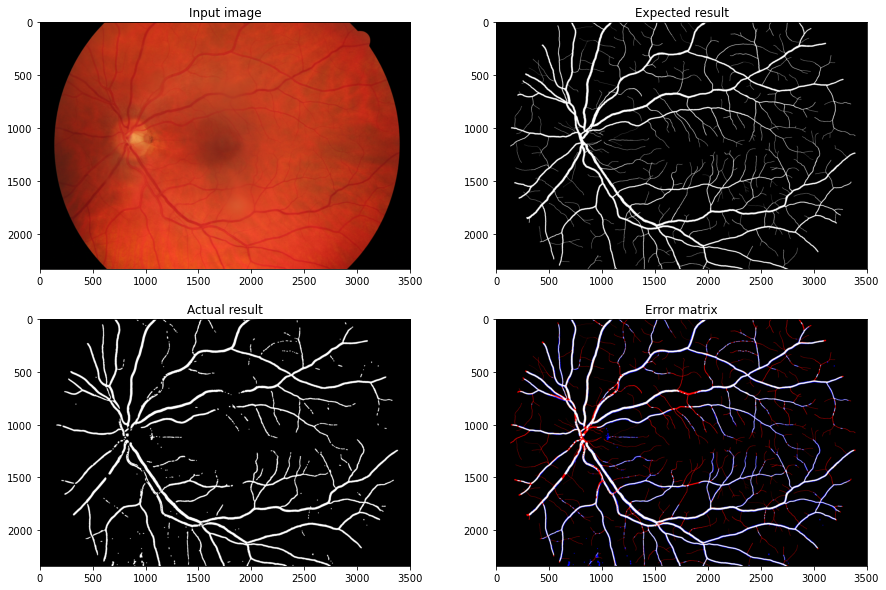

**Name**: 02_g

**Duration**: 25.8 s

**True positive**: 448993

**False positive**: 177039

**False negative**: 160729

**True negative**: 7398583

**Accuracy**: 95.9%

**Sensitivity**: 73.6%

**Specificity**: 97.7%

***

Classification done


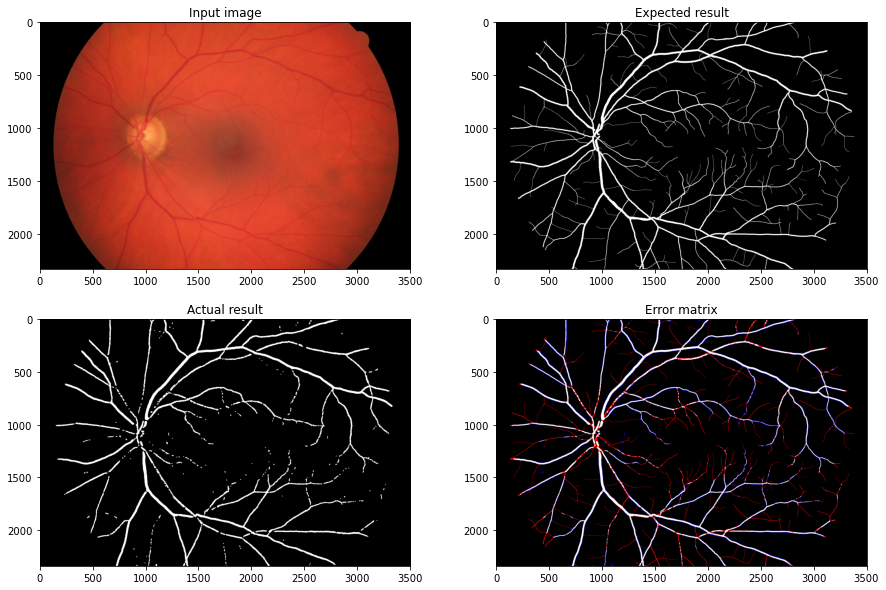

**Name**: 04_g

**Duration**: 28.0 s

**True positive**: 367590

**False positive**: 123827

**False negative**: 159326

**True negative**: 7534601

**Accuracy**: 96.5%

**Sensitivity**: 69.8%

**Specificity**: 98.4%

***

### Summary

**Classifier**: Image Processing v4

**Duration**: 26.2 s

**Accuracy**: 95.7%

**Sensitivity**: 71.3%

**Specificity**: 97.7%

In [6]:
run_classifier(
    ImageProcessingClassifierV4, 
    raw_image_loader_kwargs=dict(), 
    image_loader_kwargs=dict(), 
    mask_loader_kwargs=dict(binarize=True)
)

In [7]:
size = (600, 400)

run_classifier(
    KnnClassifier, 
    raw_image_loader_kwargs=dict(size=size), 
    image_loader_kwargs=dict(as_gray=True, size=size, standarize=True, clahe=True), 
    mask_loader_kwargs=dict(binarize=True, size=size), 
    load=True, 
    patch_size=5,
    patch_count=10000,
    training_balance=0.5
)

# K Nearest Neighbors

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\wykrywanie_naczyn_141240_141249\\eye-fundus-master\\model\\knn'

In [ ]:
size = (600, 400)

run_classifier(
    NeuralNetworkClassifier, 
    raw_image_loader_kwargs=dict(size=size), 
    image_loader_kwargs=dict(as_gray=True, standarize=True, clahe=True, add_dimension=True, size=size), 
    mask_loader_kwargs=dict(binarize=True, size=size), 
    load=True, 
    patch_size=16, 
    batch_size=10000,
    epochs=10,
    training_balance=0.9
)

# Final summary

In [ ]:
for name, data in SUMMARY.items():
    show_summary(name, data)